In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
tqdm.pandas()

In [2]:
import sys
sys.path.insert(2,'..')


In [3]:
import functions
import selection
import DataPull

In [4]:
df_sp500 = DataPull.pull_microsoft()


In [5]:
selection_sp500= selection.filter_options(df_sp500)
selection_sp500['implied_volatility'] = selection_sp500.progress_apply(functions.implied_volatility,axis =1 )
average_iv_sp500= functions.average_daily_implied_volatility(selection_sp500)


  0%|▎                                                                            | 295/60723 [00:01<03:03, 329.57it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\functions.py:8: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
  5%|███▍                                                                        | 2794/60723 [00:13<03:52, 248.89it/s]C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\scipy\optimize\_zeros_py.py:329: RuntimeWarning: overflow encountered in scalar divide
  newton_step = fval / fder
X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\

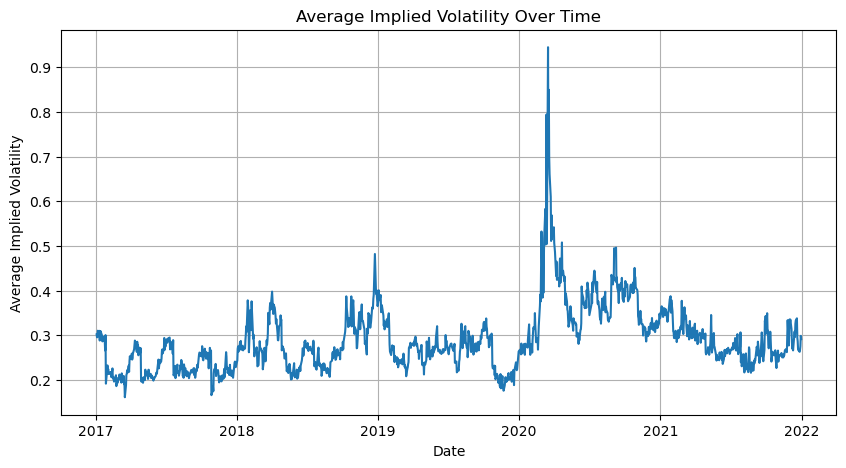

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(average_iv_sp500['date'], average_iv_sp500['average_iv'])
plt.title('Average Implied Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Average Implied Volatility')
plt.grid(True)
plt.show()

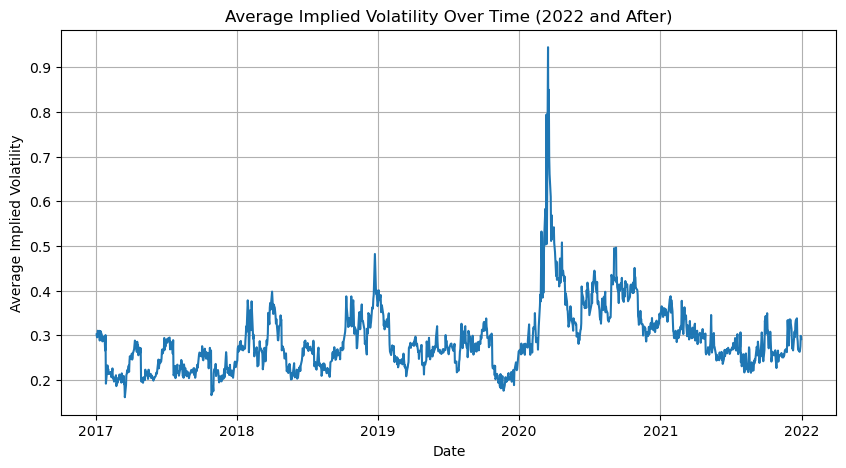

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'average_iv_sp500' is a pandas DataFrame and 'date' is in datetime format
# If 'date' is not in datetime format, you will need to convert it first:
# average_iv_sp500['date'] = pd.to_datetime(average_iv_sp500['date'])

# Filter the data for dates from 2022 onwards
filtered_data = average_iv_sp500

# Plotting the filtered data
plt.figure(figsize=(10, 5))
plt.plot(filtered_data['date'], filtered_data['average_iv'])
plt.title('Average Implied Volatility Over Time (2022 and After)')
plt.xlabel('Date')
plt.ylabel('Average Implied Volatility')
plt.grid(True)
plt.show()


In [8]:
average_iv_sp500

,date,average_iv
0,2017-01-03,0.301849
1,2017-01-04,0.295451
2,2017-01-05,0.295422
3,2017-01-06,0.310046
4,2017-01-09,0.307149
...,...,...
1254,2021-12-27,0.262805
1255,2021-12-28,0.267030
1256,2021-12-29,0.275513
1257,2021-12-30,0.298512


In [9]:
series = filtered_data['average_iv']


In [10]:
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, 'data')
os.makedirs(data_dir, exist_ok=True)
series.to_pickle(os.path.join(data_dir, 'average_iv_series_with_date_microsoft.pkl'))


In [11]:
selection_sp500
selection_sp500.to_pickle(os.path.join(data_dir, 'Fulldataframemicrosoft.pkl'))

In [1]:
selection_sp500


NameError: name 'selection_sp500' is not defined